In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pickle

from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


sys.path.insert(0, '../../src') # way to get access to the scr path
from read_write_files import ReadWriteFiles
from predict import Predict

# calling the data frame with the information of the csv file
immo = ReadWriteFiles().get_data_frame()
display(immo.head())
display(immo.shape)

,transactionSubtype,price,type,subtype,region,province,floor,bedroomCount,netHabitableSurface,constructionYear,...,hasSwimmingPool,hasAirConditioning,bathroomCount,showerRoomCount,toiletCount,parkingCountIndoor,parkingCountOutdoor,primaryEnergyConsumptionPerSqm,epcScore,hasDoubleGlazing
id,,,,,,,,,,,,,,,,,,,,,
10616910,BUY_REGULAR,399000,APARTMENT,APARTMENT,Flanders,Limburg,1.0,2.0,125.0,2013.0,...,0,0,1.0,0.0,1.0,1.0,1.0,142.0,B,1
10616911,BUY_REGULAR,423000,APARTMENT,APARTMENT,Wallonie,Walloon Brabant,2.0,3.0,155.0,2014.0,...,0,0,1.0,2.0,2.0,4.0,8.0,112.0,B,1
10616934,BUY_REGULAR,169000,APARTMENT,GROUND_FLOOR,Wallonie,Liege,0.0,1.0,54.0,1850.0,...,0,0,1.0,1.0,1.0,0.0,0.0,109.0,B,1
10616833,BUY_REGULAR,275000,APARTMENT,APARTMENT,Wallonie,Walloon Brabant,1.0,1.0,66.0,2025.0,...,0,0,1.0,0.0,1.0,53.0,53.0,50.0,A,1
10616966,BUY_REGULAR,185000,APARTMENT,APARTMENT,Flanders,Antwerp,3.0,2.0,74.0,1975.0,...,0,0,1.0,0.0,1.0,0.0,0.0,238.0,C,1


(10540, 30)

In [2]:
# Getting the X and y parameters
X, y = Predict().get_X_y(immo)

In [3]:
# Splitting the X and y parameters with the train and test information in
X_train, X_test, y_train, y_test = Predict().get_train_test(X, y)
# Encode de data with OneHotEncoder
X_train, X_test = Predict().encode_data(X_train, X_test)

print(X_train.shape)
print(X_test.shape)

(7378, 85)
(3162, 85)


# Linear Regression

In [4]:
# making instantiation of LinearRegression
model = LinearRegression()
# fitting the model
model.fit(X_train, y_train)

# predition with training data 
pred_train= model.predict(X_train)
# calculating performance metric training
score, mse, rmse, mae = Predict().get_performance(y_train, pred_train)

# Print the performance metrics
print('Train: Score: %.2f' %score)
print('Train: Mean Squared Error:', np.sqrt(mse))
print('Train: Root Mean Squared Error:', rmse)
print('Train: Mean Absolute Error: ', mae)

# predition with test data
pred_test= model.predict(X_test)
# calculating performance metric test
score, mse, rmse, mae = Predict().get_performance(y_test, pred_test)

# Print the performance metrics
print('______________________________________')
print('Test: Score: %.2f' %score)
print('Test: Mean Squared Error:', np.sqrt(mse))
print('Test: Root Mean Squared Error:', rmse)
print('Test: Mean Absolute Error: ', mae)

Train: Score: 0.45
Train: Mean Squared Error: 304842.1748740689
Train: Root Mean Squared Error: 304842.1748740689
Train: Mean Absolute Error:  148378.33318714137
______________________________________
Test: Score: 0.39
Test: Mean Squared Error: 314375.618449895
Test: Root Mean Squared Error: 314375.618449895
Test: Mean Absolute Error:  150425.5476073704


[Text(0.5, 1.0, 'Linear Regression - Test VS Predicted Prices'),
 Text(0, 0.5, 'Predicted Price'),
 Text(0.5, 0, 'Test Price')]

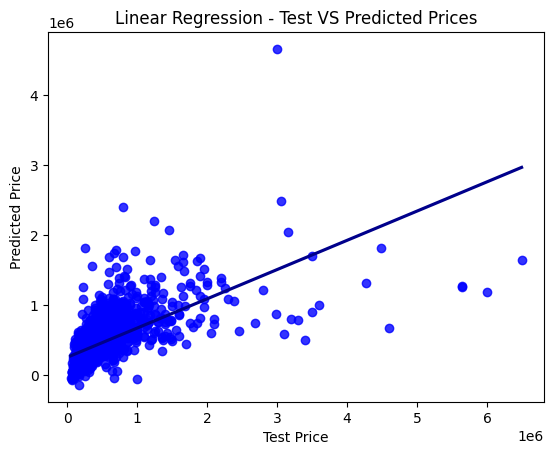

In [5]:
# Plot measuring the test and prediction test data
sns.regplot(x=y_test, y=pred_test, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"}).set(
    title='Linear Regression - Test VS Predicted Prices', ylabel='Predicted Price', xlabel='Test Price')

# XGBoost

In [6]:
# making instantiation of XGBRegressor
xgb_r = XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)
# Fitting the model
xgb_r.fit(X_train, y_train)

# predition with training data 
pred_train= xgb_r.predict(X_train)
# calculating performance metric training
score, mse, rmse, mae = Predict().get_performance(y_train, pred_train)

# Print the performance metrics
print('Train: Score: %.2f' %score)
print('Train: Mean Squared Error:', np.sqrt(mse))
print('Train: Root Mean Squared Error:', rmse)
print('Train: Mean Absolute Error: ', mae)

# predition with test data
pred_test= xgb_r.predict(X_test)
# calculating performance metric test
score, mse, rmse, mae = Predict().get_performance(y_test, pred_test)

# Print the performance metrics
print('______________________________________')
print('Test: Score: %.2f' %score)
print('Test: Mean Squared Error:', np.sqrt(mse))
print('Test: Root Mean Squared Error:', rmse)
print('Test: Mean Absolute Error: ', mae)

[14:25:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
Train: Score: 0.84
Train: Mean Squared Error: 162915.78559024035
Train: Root Mean Squared Error: 162915.78559024035
Train: Mean Absolute Error:  93152.7631058976
______________________________________
Test: Score: 0.62
Test: Mean Squared Error: 248448.24623546886
Test: Root Mean Squared Error: 248448.24623546886
Test: Mean Absolute Error:  118262.68001116777


[Text(0.5, 1.0, 'XGBoost Regressor - Test VS Predicted Prices'),
 Text(0, 0.5, 'Predicted Price'),
 Text(0.5, 0, 'Test Price')]

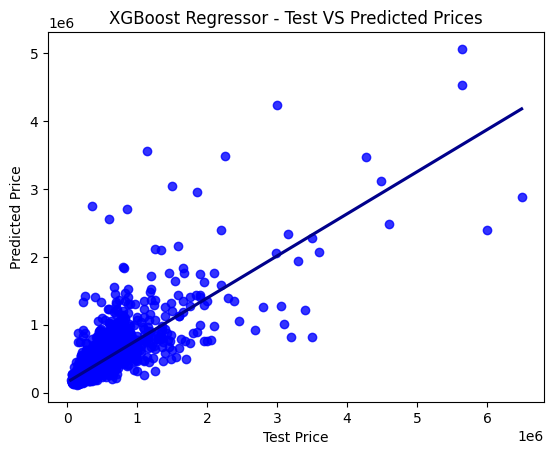

In [7]:
# Plot measuring the test and prediction test data
sns.regplot(x=y_test, y=pred_test, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"}).set(
    title='XGBoost Regressor - Test VS Predicted Prices', ylabel='Predicted Price', xlabel='Test Price')

# Decision Tree Regressor

In [8]:
# making instantiation of DecisionTreeRegressor
dtree = DecisionTreeRegressor(max_depth=8, min_samples_leaf=0.13, random_state=3)
# fitting the model
dtree.fit(X_train, y_train)

# predition with training data 
pred_train= xgb_r.predict(X_train)
# calculating performance metric training
score, mse, rmse, mae = Predict().get_performance(y_train, pred_train)

# Print the performance metrics
print('Train: Score: %.2f' %score)
print('Train: Mean Squared Error:', np.sqrt(mse))
print('Train: Root Mean Squared Error:', rmse)
print('Train: Mean Absolute Error: ', mae)

# predition with test data
pred_test= xgb_r.predict(X_test)
# calculating performance metric test
score, mse, rmse, mae = Predict().get_performance(y_test, pred_test)

# Print the performance metrics
print('______________________________________')
print('Test: Score: %.2f' %score)
print('Test: Mean Squared Error:', np.sqrt(mse))
print('Test: Root Mean Squared Error:', rmse)
print('Test: Mean Absolute Error: ', mae)


Train: Score: 0.84
Train: Mean Squared Error: 162915.78559024035
Train: Root Mean Squared Error: 162915.78559024035
Train: Mean Absolute Error:  93152.7631058976
______________________________________
Test: Score: 0.62
Test: Mean Squared Error: 248448.24623546886
Test: Root Mean Squared Error: 248448.24623546886
Test: Mean Absolute Error:  118262.68001116777


[Text(0.5, 1.0, 'Decision Tree - Test VS Predicted Prices'),
 Text(0, 0.5, 'Predicted Price'),
 Text(0.5, 0, 'Test Price')]

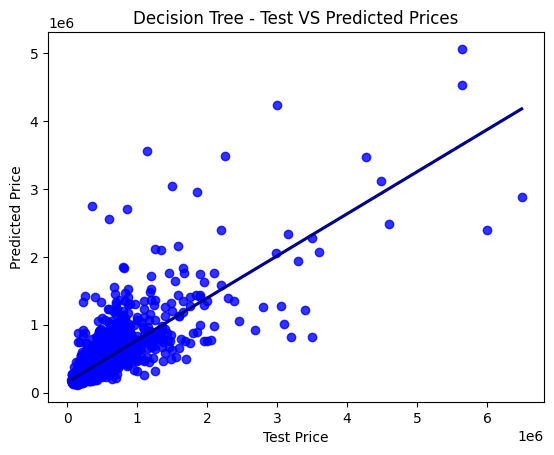

In [9]:
# Plot measuring the test and prediction test data
sns.regplot(x=y_test, y=pred_test, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"}).set(
    title='Decision Tree - Test VS Predicted Prices', ylabel='Predicted Price', xlabel='Test Price')

# Random Forest Regressor

In [10]:
# making object of RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=500, oob_score=True, random_state=100)
# fitting the model
model_rf.fit(X_train, y_train) 

# predition with training data 
pred_train= model_rf.predict(X_train)
# calculating performance metric training
score, mse, rmse, mae = Predict().get_performance(y_train, pred_train)

# Print the performance metrics
print('Train: Score: %.2f' %score)
print('Train: Mean Squared Error:', np.sqrt(mse))
print('Train: Root Mean Squared Error:', rmse)
print('Train: Mean Absolute Error: ', mae)

# predition with test data
pred_test= model_rf.predict(X_test)
# calculating performance metric test
score, mse, rmse, mae = Predict().get_performance(y_test, pred_test)

# Print the performance metrics
print('______________________________________')
print('Test: Score: %.2f' %score)
print('Test: Mean Squared Error:', np.sqrt(mse))
print('Test: Root Mean Squared Error:', rmse)
print('Test: Mean Absolute Error: ', mae)



d:\Cesar\BeCode\Projects\immo-eliza-data-analysis\immo-eliza-data-analysis-env\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train: Score: 0.95
Train: Mean Squared Error: 91601.45052681782
Train: Root Mean Squared Error: 91601.45052681782
Train: Mean Absolute Error:  41955.703226430465
______________________________________
Test: Score: 0.67
Test: Mean Squared Error: 230932.92418608157
Test: Root Mean Squared Error: 230932.92418608157
Test: Mean Absolute Error:  110663.90420786396


[Text(0.5, 1.0, 'Random Forest - Test VS Predicted Prices'),
 Text(0, 0.5, 'Predicted Price'),
 Text(0.5, 0, 'Test Price')]

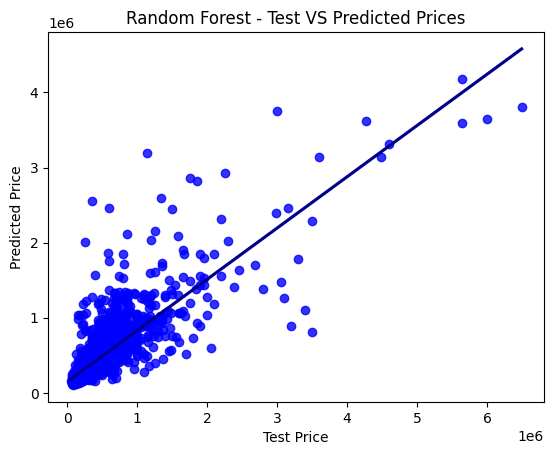

In [11]:
# Plot measuring the test and prediction test data
sns.regplot(x=y_test, y=pred_test, ci=None, scatter_kws={"color": "blue"}, line_kws={"color": "darkblue"}).set(
    title='Random Forest - Test VS Predicted Prices', ylabel='Predicted Price', xlabel='Test Price')

In [12]:
filename = "../../models/immo_model.pickle"

# save model
pickle.dump(model_rf, open(filename, "wb"))